In [55]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Cyber_security.csv") # https://www.kaggle.com/datasets/katerynameleshenko/cyber-security-indexes
df

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69
...,...,...,...,...,...,...
187,Venezuela,Africa,0.807,27.06,28.57,43.14
188,Vietnam,Asia-Pasific,NaN,94.59,36.36,47.69
189,Yemen,Asia-Pasific,NaN,NaN,7.79,NaN
190,Zambia,Africa,0.745,68.88,55.84,29.66


### Через те, що багато рядків мають пробіли, їх прибирання скоротить датасет майже вдвічі, тож спробуємо заповнити пробіли. За допомогою індексу вкладу країни в національну кібербезпеку, припустимо, що вони вкладають в глобальну кібербезпеку приблизно стільки ж, скільки це робить найближчий ненульовий сусід, що має приблизно такий самий індекс національного вкладу. Аналогічний крок зробимо, помінявши місцями глобальний та національний індекс. Стовпець DDL представляє рівень цифрової розвиненості, тож припустимо, що країни, про які немає даних, мають найнижчий індекс. Стовпець CEI для нульових країн буде нульовим, адже не було об'єктивної оцінки рівню відкритості до кібервразливостей

In [79]:
import numpy as np

prefill_gci = df.copy()

sorted = df.copy().sort_values(by=['NCSI'], ascending=True)
for i in range(1, len(sorted) - 1):
    prev = sorted.iloc[i - 1]
    next = sorted.iloc[i + 1]
    curr = sorted.iloc[i]
    var = None
    if np.isnan(curr['GCI']) and (not np.isnan(prev['GCI']) or not np.isnan(curr['GCI'])):
        if not np.isnan(prev['GCI']) and not np.isnan(curr['GCI']):
            var = prev['GCI'] if np.abs(prev['GCI'] - curr['GCI']) <= np.abs(curr['GCI'] - next['GCI']) else next['GCI']
        else:
            sign = np.random.choice([-1, 1])
            factor = np.round(np.random.uniform(0.0, 0.2), 2)
            var = prev['GCI'] + sign * factor if np.isnan(next['GCI']) else next['GCI'] + sign * factor
    if var is not None:
        sorted.iloc[i, 3] = var

sorted.sort_values(by=['GCI'], ascending=True, inplace=True)
for i in range(1, len(sorted) - 1):
    prev = sorted.iloc[i - 1]
    next = sorted.iloc[i + 1]
    curr = sorted.iloc[i]
    var = None
    if np.isnan(curr['NCSI']) and (not np.isnan(prev['NCSI']) or not np.isnan(curr['NCSI'])):
        if not np.isnan(prev['NCSI']) and not np.isnan(curr['NCSI']):
            var = prev['NCSI'] if np.abs(prev['NCSI'] - curr['NCSI']) <= np.abs(curr['NCSI'] - next['NCSI']) else next['NCSI']
        else:
            sign = np.random.choice([-1, 1])
            factor = np.round(np.random.uniform(0.0, 0.2), 2)
            var = prev['NCSI'] + sign * factor if np.isnan(next['NCSI']) else next['NCSI'] + sign * factor
    if var is not None:
        sorted.iloc[i, 4] = var

sign = np.random.choice([-1, 1])
factor = np.round(np.random.uniform(0.0, 0.2), 2)
sorted[['DDL']] = sorted.fillna(22.86 + sign * factor, axis=0)[['DDL']]
sorted.fillna(0, inplace=True)
sorted

,Country,Region,CEI,GCI,NCSI,DDL
124,North Korea,Asia-Pasific,0.000,1.35,0.00,22.77
52,Equatorial Guinea,Africa,0.000,1.46,0.00,22.77
27,Burundi,Africa,0.000,1.73,7.79,18.64
46,Djibouti,Africa,0.000,1.73,7.70,22.77
53,Eritrea,Africa,0.000,1.73,22.23,22.77
...,...,...,...,...,...,...
152,Singapore,Asia-Pasific,0.231,98.52,71.43,79.93
54,Estonia,Europe,0.134,99.48,93.51,75.59
147,Saudi Arabia,Asia-Pasific,0.390,99.54,84.42,63.89
181,United Kingdom,Europe,0.207,99.54,89.61,79.96


In [81]:
x = sorted[['CEI', 'GCI', 'NCSI', 'DDL']]
x_scaled = StandardScaler().fit_transform(x)

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit_predict(x_scaled)
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit_predict(x_scaled)

print("Clustering is done!")

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 1,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 3, 0,
       0, 0, 3, 3, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 2, 1, 2, 1, 4, 1, 2, 4, 4, 1, 4, 1,
       1, 1, 1, 4, 2, 1, 2, 1, 1, 4, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 4, 1, 1, 2, 4, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

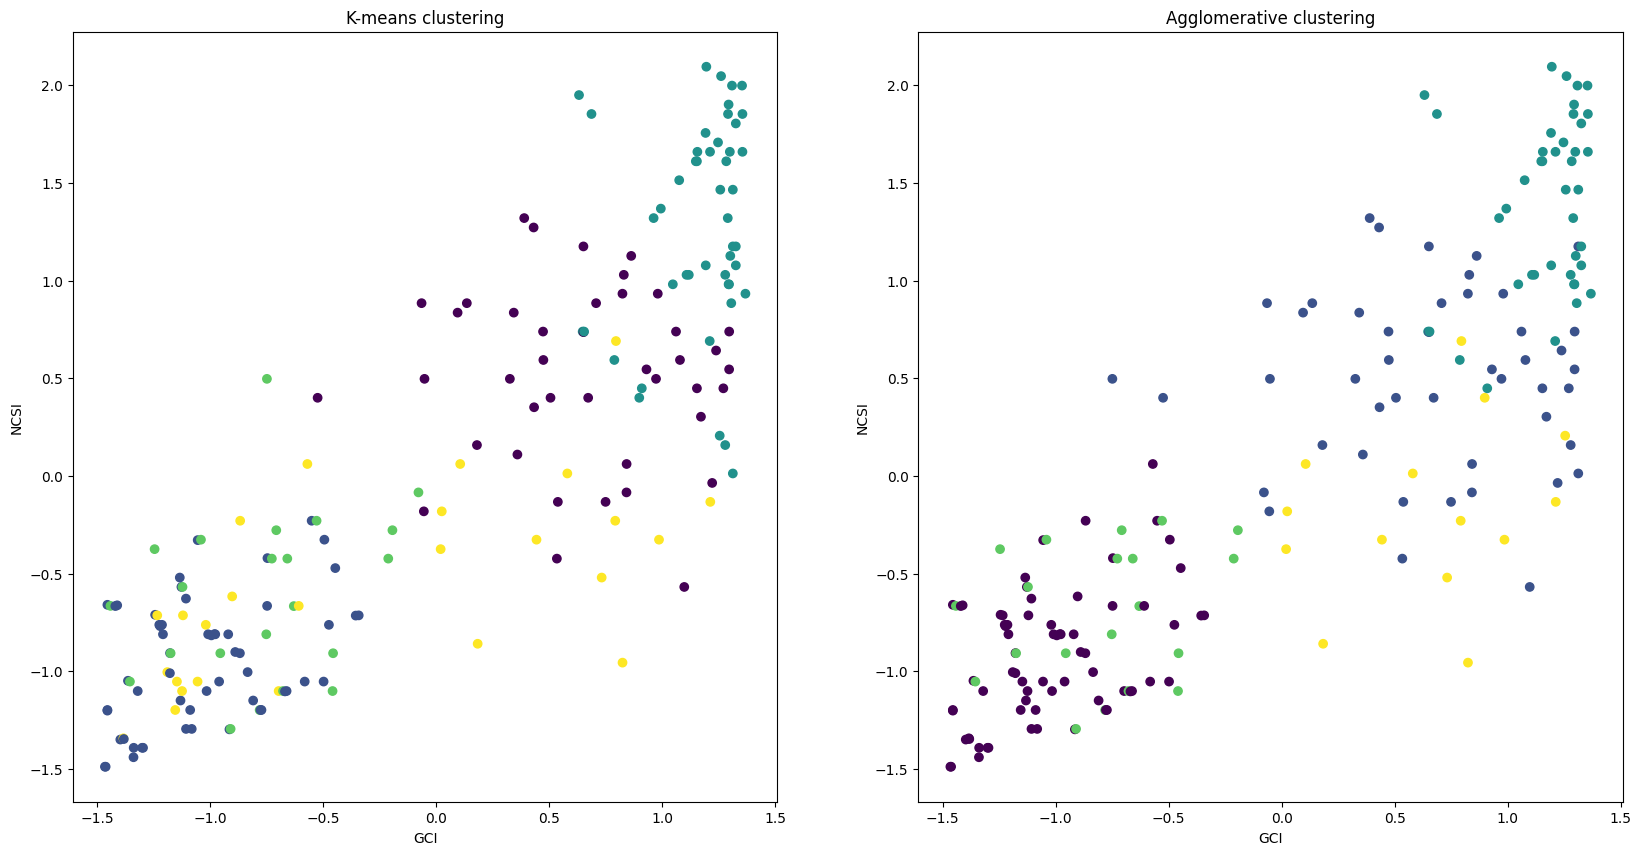

In [83]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.scatter(x_scaled[:, 1], x_scaled[:, 2], c=kmeans.labels_)
plt.title('K-means clustering')
plt.xlabel(x.columns[1])
plt.ylabel(x.columns[2])
plt.subplot(1,2,2)
plt.scatter(x_scaled[:, 1], x_scaled[:, 2], c=agglo.labels_)
plt.title('Agglomerative clustering')
plt.xlabel(x.columns[1])
plt.ylabel(x.columns[2])
plt.show()

A

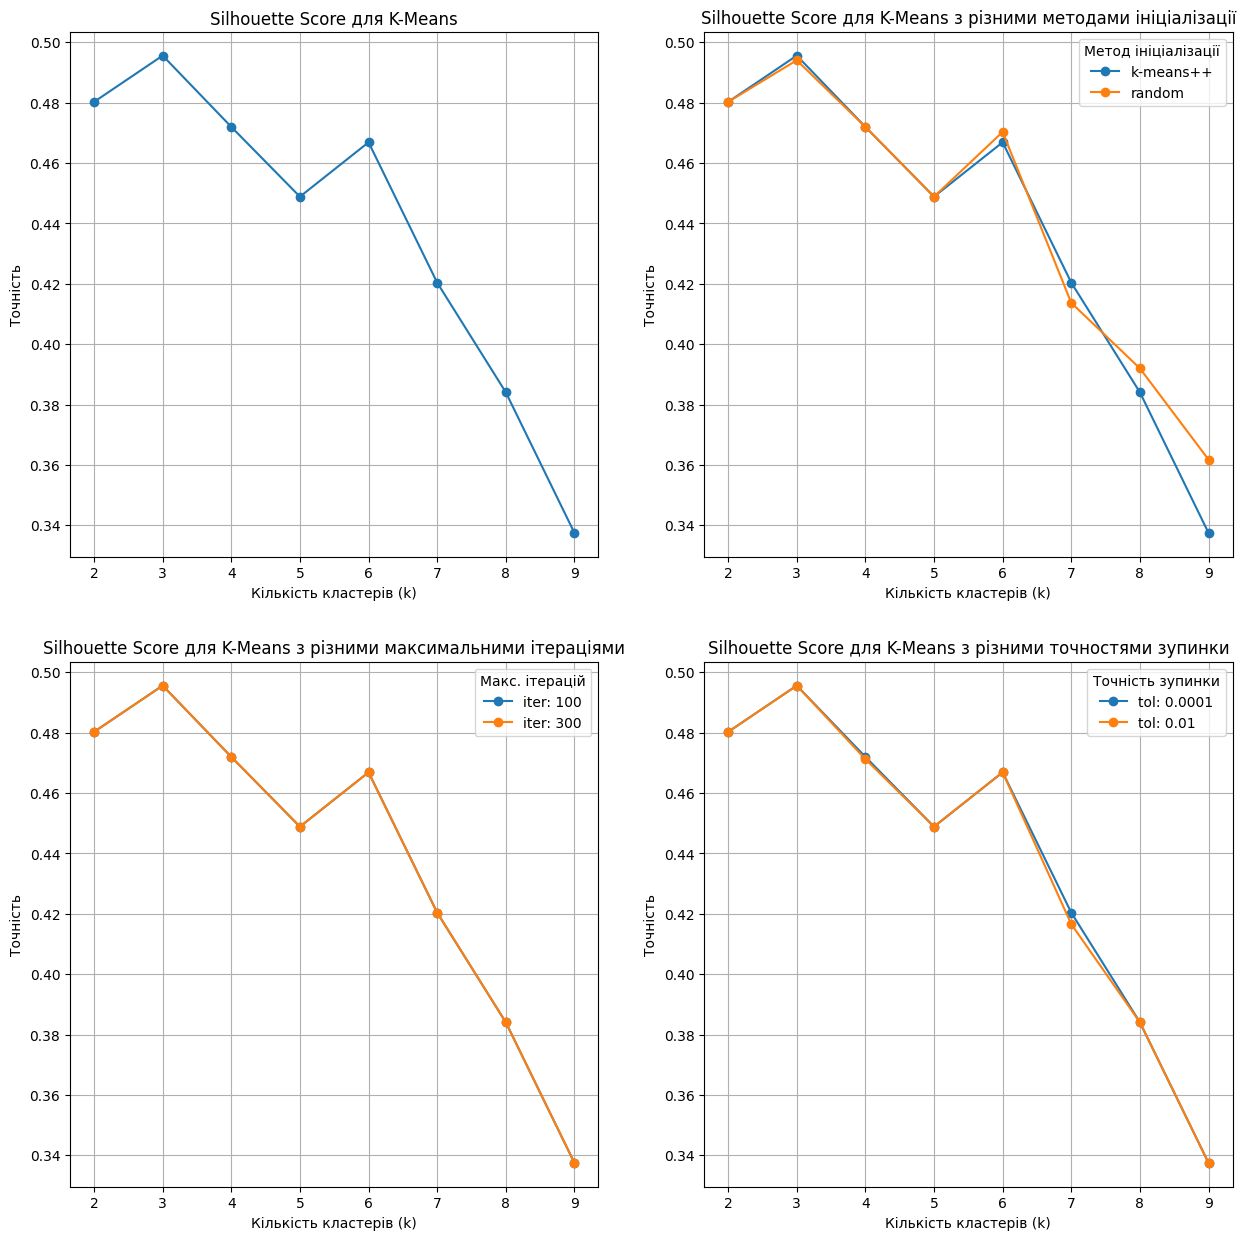

In [87]:
# Визначення параметрів для дослідження
k_values = range(2, 10)
initialization_methods = ['k-means++', 'random']
max_iters = [100, 300]
tolerances = [0.0001, 0.01]

plt.figure(figsize=(15, 15))

# 1. Silhouette Score для різних k
silhouette_scores_kmeans = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    silhouette_scores_kmeans.append(score)

plt.subplot(2, 2, 1)
plt.plot(k_values, silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Score для K-Means')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Точність')
plt.xticks(k_values)
plt.grid()

# 2. Ініціалізація центроїдів
for init in initialization_methods:
    scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, init=init, random_state=42)
        kmeans.fit(x_scaled)
        score = silhouette_score(x_scaled, kmeans.labels_)
        scores.append(score)

    plt.subplot(2, 2, 2)
    plt.plot(k_values, scores, marker='o', label=init)

plt.title('Silhouette Score для K-Means з різними методами ініціалізації')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Точність')
plt.xticks(k_values)
plt.legend(title='Метод ініціалізації')
plt.grid()

# 3. Максимальна кількість ітерацій
for max_iter in max_iters:
    scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=42)
        kmeans.fit(x_scaled)
        score = silhouette_score(x_scaled, kmeans.labels_)
        scores.append(score)

    plt.subplot(2, 2, 3)
    plt.plot(k_values, scores, marker='o', label=f'iter: {max_iter}')

plt.title('Silhouette Score для K-Means з різними максимальними ітераціями')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Точність')
plt.xticks(k_values)
plt.legend(title='Макс. ітерацій')
plt.grid()

# 4. Точність зупинки
for tol in tolerances:
    scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, tol=tol, random_state=42)
        kmeans.fit(x_scaled)
        score = silhouette_score(x_scaled, kmeans.labels_)
        scores.append(score)

    plt.subplot(2, 2, 4)
    plt.plot(k_values, scores, marker='o', label=f'tol: {tol}')

plt.title('Silhouette Score для K-Means з різними точностями зупинки')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Точність')
plt.xticks(k_values)
plt.legend(title='Точність зупинки')
plt.grid()


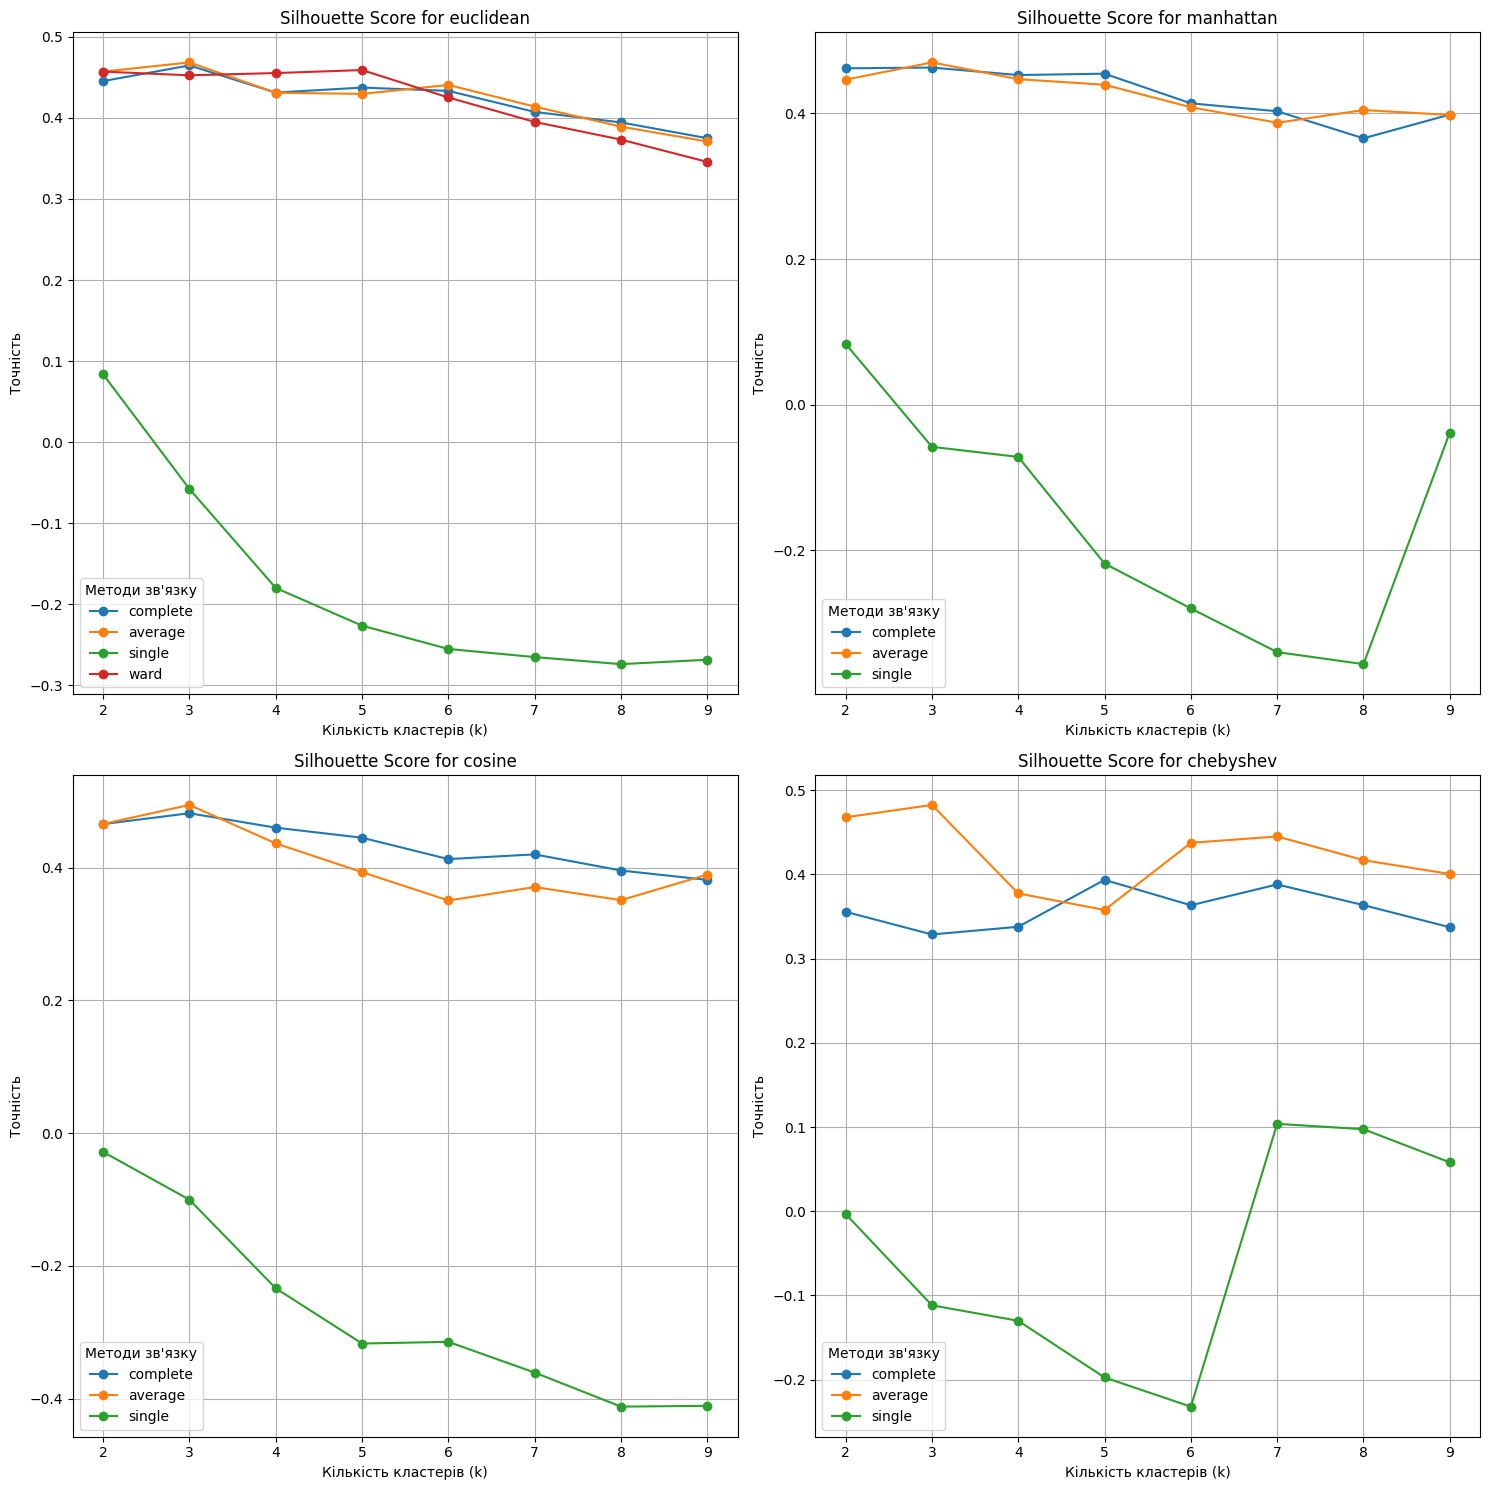

In [109]:
linkage_methods = ['complete', 'average', 'single', 'ward']
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev']

plt.figure(figsize=(15, 15))
i = 0
ward_and_euclidean = False
for distance in distance_metrics:
    i = i + 1
    plt.subplot(2, 2, i)
    for method in linkage_methods:
        if method == 'ward' and distance != 'euclidean':
            continue
        scores = []
        for k in k_values:
            agglo = AgglomerativeClustering(n_clusters=k, linkage=method, metric=distance)
            agglo.fit(x_scaled)
            score = silhouette_score(x_scaled, agglo.labels_)
            scores.append(score)
        plt.plot(k_values, scores, marker='o', label=method)

    plt.title(f"Silhouette Score for {distance}")
    plt.xlabel('Кількість кластерів (k)')
    plt.ylabel('Точність')
    plt.xticks(k_values)
    plt.legend(title="Методи зв'язку")
    plt.grid()

plt.tight_layout()
plt.show()

### Для цього невеличкого датасету найкраще підходить метрика Чебишева, метод зв'язування типу "середнє" та три кластери. Коефіцієнт силуету найбільше близький до 0.5, тобто елементи датасету краще згруповані.